In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime

In [3]:
data = pd.read_csv("weatherHistory.csv")
data = data[["Formatted Date", "Temperature (C)"]]
data

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667
96449,2016-09-09 20:00:00.000 +0200,24.583333
96450,2016-09-09 21:00:00.000 +0200,22.038889
96451,2016-09-09 22:00:00.000 +0200,21.522222


In [4]:
data["Formatted Date"] = pd.to_datetime(data["Formatted Date"])
data.head()

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00+02:00,9.472222
1,2006-04-01 01:00:00+02:00,9.355556
2,2006-04-01 02:00:00+02:00,9.377778
3,2006-04-01 03:00:00+02:00,8.288889
4,2006-04-01 04:00:00+02:00,8.755556


In [5]:
data["DayOfYear"] = data["Formatted Date"].map(lambda date: int(format(datetime(date.year, date.month, date.day), "%j")))
data["Year"] = data["Formatted Date"].map(lambda date: date.year)
data

,Formatted Date,Temperature (C),DayOfYear,Year
0,2006-04-01 00:00:00+02:00,9.472222,91,2006
1,2006-04-01 01:00:00+02:00,9.355556,91,2006
2,2006-04-01 02:00:00+02:00,9.377778,91,2006
3,2006-04-01 03:00:00+02:00,8.288889,91,2006
4,2006-04-01 04:00:00+02:00,8.755556,91,2006
...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,26.016667,253,2016
96449,2016-09-09 20:00:00+02:00,24.583333,253,2016
96450,2016-09-09 21:00:00+02:00,22.038889,253,2016
96451,2016-09-09 22:00:00+02:00,21.522222,253,2016


In [6]:
target_data = data.groupby(["Year", "DayOfYear"])["Temperature (C)"].mean().reset_index()
target_data

,Year,DayOfYear,Temperature (C)
0,2006,1,3.873148
1,2006,2,5.418519
2,2006,3,2.319444
3,2006,4,2.274074
4,2006,5,2.698148
...,...,...,...
4013,2016,362,0.280324
4014,2016,363,0.224306
4015,2016,364,0.169676
4016,2016,365,0.119444


In [7]:
X = target_data["DayOfYear"].values
X = X.reshape(-1, 1)
X.shape

(4018, 1)

In [8]:
Y = target_data["Temperature (C)"].values
Y = Y.reshape(-1, 1)
Y.shape

(4018, 1)

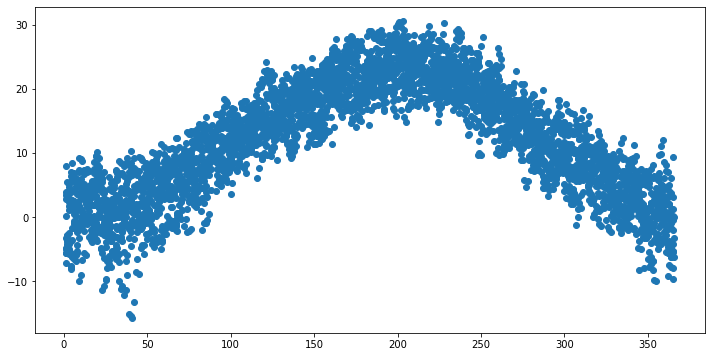

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(X, Y)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

In [9]:
class Perceptron:
    def __init__(self, lr_w, lr_b, epochs):
        # hyper params
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.epochs = epochs
        self.w = np.random.rand(1, 1)
        self.b = np.random.rand(1, 1)
    
    # Train
    def fit(self, X_train, Y_train):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw={'width_ratios': [3, 1, 1]})
        Errors_train = []
        Errors_test = []
        w_list = []
        b_list = []
        N = X_train.shape[0]
        
        for epoch in range(self.epochs):
            for i in range(N):
                x = X_train[i]
                y = Y_train[i]
                
                y_pred = x * self.w + self.b
                e = y - y_pred
                
                # update
                self.w += self.lr_w * e * x
                self.b += self.lr_b * e
                w_list.append(self.w)
                b_list.append(self.b)

            # visualization
            Y_pred = X_train * self.w + self.b
            ax1.clear()
            ax1.scatter(X_train, Y_train, c="green")
            ax1.plot(X_train, Y_pred, c="red")
             
            Error_train = np.mean(np.abs(Y_train - Y_pred)) # MAE
            Errors_train.append(Error_train)
            ax2.clear()
            ax2.set_title("MAE Loss (Train)")
            ax2.plot(Errors_train)
            
            Y_pred = X_test * self.w + self.b
            Error_test = np.mean(np.abs(Y_test - Y_pred)) # MAE
            Errors_test.append(Error_test)
            ax3.clear()
            ax3.set_title("MAE Loss (Test)")
            ax3.plot(Errors_test)
            
        plt.show()
        return w_list, b_list
        
    def evaluate(self, X_test, Y_true, loss="MAE"):
        Y_pred = self.predict(X_test)
        if loss == "MAE":
            Error_test = np.mean(np.abs(Y_true - Y_pred))
            return f"MAE Loss for X_test: {Error_test}"
        elif loss == "MSE":
            Error_test = np.mean((Y_true - Y_pred) ** 2)
            return f"MSE Loss for X_test: {Error_test}"
    
    def predict(self, x_test):
        y_pred = x_test * self.w + self.b
        return y_pred

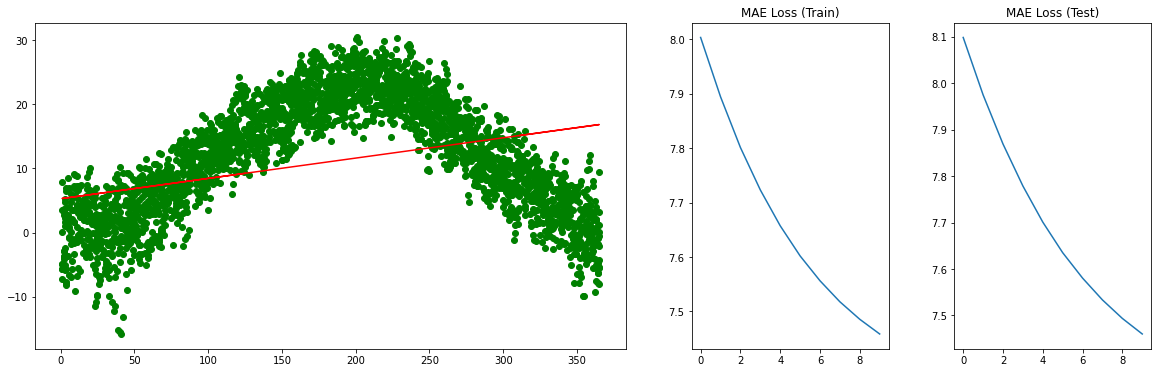

In [10]:
perceptron = Perceptron(0.0000001, 0.0001, 10)
w_list, b_list = perceptron.fit(X_train, Y_train)

In [11]:
print(perceptron.evaluate(X_test, Y_test, loss="MAE"))
print(perceptron.evaluate(X_test, Y_test, loss="MSE"))

MAE Loss for X_test: 7.460064607370713
MSE Loss for X_test: 80.03361087712365


In [12]:
perceptron.predict(200)

array([[11.61047593]])

In [13]:
np.save("npy files/w.npy", w_list)
np.save("npy files/b.npy", b_list)

In [14]:
np.load("npy files/b.npy")

array([[[5.28366831]],

       [[5.28366831]],

       [[5.28366831]],

       ...,

       [[5.28366831]],

       [[5.28366831]],

       [[5.28366831]]])

In [15]:
np.load("npy files/w.npy")

array([[[0.03163404]],

       [[0.03163404]],

       [[0.03163404]],

       ...,

       [[0.03163404]],

       [[0.03163404]],

       [[0.03163404]]])